Dump the data file on dataframe and print the rows and columns

In [1]:
import pandas as pd

df = pd.read_csv('advertising.csv')
df.shape

(200, 4)

Columns in the dataframe 

In [2]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Types of all columns

In [3]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Get first five rows of the dataframe

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Get last five rows of the dataframe

In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Plot Scatter plots bwtween variables

In [6]:
import matplotlib.pyplot as plt

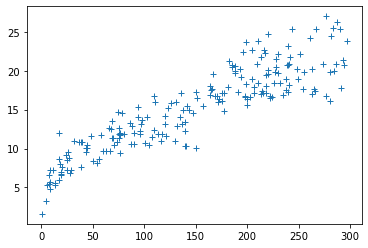

In [7]:
plt.plot(df['TV'], df['Sales'], '+')

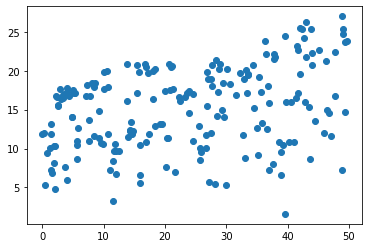

In [8]:
plt.plot(df['Radio'], df['Sales'], 'o')

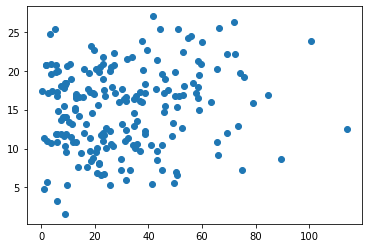

In [9]:
plt.plot(df['Newspaper'], df['Sales'], 'o')

Plot scatter matrix of all scatter plots

array([[<AxesSubplot:xlabel='TV', ylabel='TV'>,
        <AxesSubplot:xlabel='Radio', ylabel='TV'>,
        <AxesSubplot:xlabel='Newspaper', ylabel='TV'>,
        <AxesSubplot:xlabel='Sales', ylabel='TV'>],
       [<AxesSubplot:xlabel='TV', ylabel='Radio'>,
        <AxesSubplot:xlabel='Radio', ylabel='Radio'>,
        <AxesSubplot:xlabel='Newspaper', ylabel='Radio'>,
        <AxesSubplot:xlabel='Sales', ylabel='Radio'>],
       [<AxesSubplot:xlabel='TV', ylabel='Newspaper'>,
        <AxesSubplot:xlabel='Radio', ylabel='Newspaper'>,
        <AxesSubplot:xlabel='Newspaper', ylabel='Newspaper'>,
        <AxesSubplot:xlabel='Sales', ylabel='Newspaper'>],
       [<AxesSubplot:xlabel='TV', ylabel='Sales'>,
        <AxesSubplot:xlabel='Radio', ylabel='Sales'>,
        <AxesSubplot:xlabel='Newspaper', ylabel='Sales'>,
        <AxesSubplot:xlabel='Sales', ylabel='Sales'>]], dtype=object)

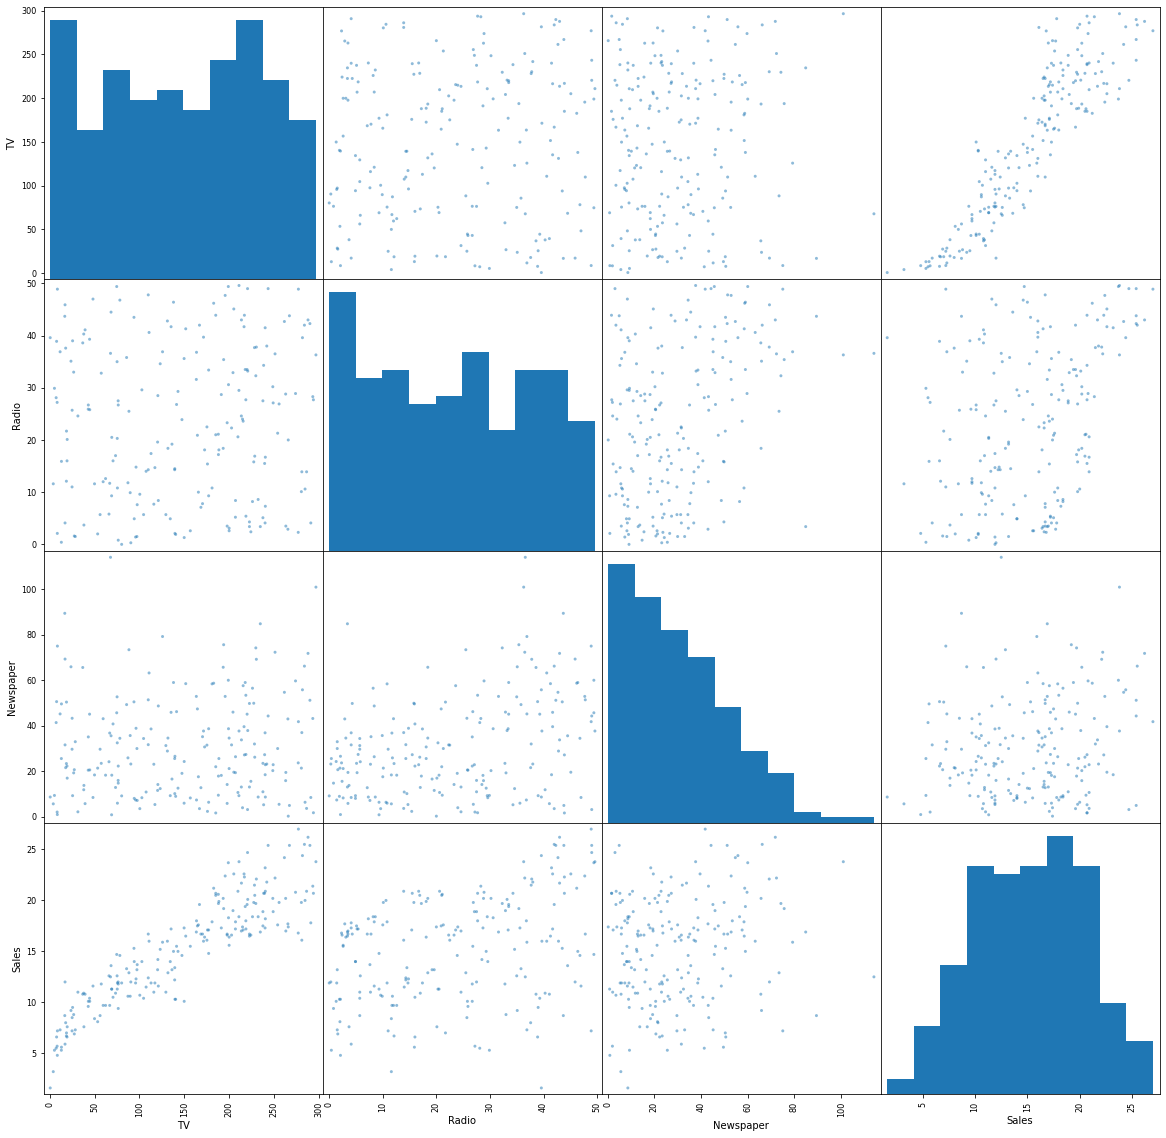

In [10]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

Get the correlation martix

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Single Variable Linear Regression

In [12]:
X = df[['TV']]
y = df[['Sales']]

print(X.columns)
print(y.columns)

Index(['TV'], dtype='object')
Index(['Sales'], dtype='object')


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.3)

In [14]:
from sklearn.linear_model import LinearRegression

single_reg = LinearRegression()
single_reg.fit(X_train, y_train)
print(single_reg.coef_)
print(single_reg.intercept_)
print(single_reg.score(X_test,y_test))

[[0.05325639]]
[7.25867124]
0.8326253494084743


In [15]:
from sklearn import metrics

y_predict = single_reg.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

MSE = 5.582
R-squared = 0.833


Linear Regression without Radio variable

In [16]:
X = df[['TV','Newspaper']]
y = df[['Sales']]

print(X.columns)
print(y.columns)

Index(['TV', 'Newspaper'], dtype='object')
Index(['Sales'], dtype='object')


In [17]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.3)
two_reg = LinearRegression()
two_reg.fit(X_train, y_train)
print(two_reg.coef_)
print(two_reg.intercept_)
print(two_reg.score(X_test,y_test))
y_predict = two_reg.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

[[0.05477233 0.02971854]]
[6.30453726]
0.8614097200270305
MSE = 3.548
R-squared = 0.861


Using all attributes for further models

In [18]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

print(X.columns)
print(y.name)

Index(['TV', 'Radio', 'Newspaper'], dtype='object')
Sales


In [19]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.3)

Linear Regression with all variables

In [20]:
comp_reg = LinearRegression()
comp_reg.fit(X_train, y_train)
print(comp_reg.coef_)
print(comp_reg.intercept_)
print(comp_reg.score(X_test,y_test))

y_predict = comp_reg.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

[ 0.0538817   0.11065426 -0.00397308]
4.684474453140304
0.8649095758932208
MSE = 4.012
R-squared = 0.865


Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2,interaction_only=False)
X2 = poly.fit_transform(X)
print(X2.shape)
print(poly.get_feature_names_out())

(200, 10)
['1' 'TV' 'Radio' 'Newspaper' 'TV^2' 'TV Radio' 'TV Newspaper' 'Radio^2'
 'Radio Newspaper' 'Newspaper^2']


In [22]:
X_train1, X_test1, y_train1,  y_test1 = train_test_split(X2,y, test_size = 0.3)
poly_reg = LinearRegression()
poly_reg.fit(X_train1, y_train1)
print(poly_reg.coef_)
print(poly_reg.intercept_)
print(poly_reg.score(X_test1,y_test1))
y_predict = poly_reg.predict(X_test1)
print("MSE = %.3f" %metrics.mean_squared_error(y_test1, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test1, y_predict))

[ 0.00000000e+00  7.03242771e-02 -4.96443611e-02 -2.88136535e-02
 -1.01399555e-04  4.71090911e-04  3.05885141e-05  1.73664056e-03
  2.45221259e-04  2.15801683e-04]
6.052718424162556
0.9344834119770534
MSE = 2.001
R-squared = 0.934


Regression Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

regressionTree = DecisionTreeRegressor()
regressionTree.fit(X_train,y_train)
y_predict = regressionTree.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

MSE = 2.471
R-squared = 0.917


Plot Regression Tree

In [24]:
from sklearn import tree

text_representation = tree.export_text(regressionTree)
print(text_representation)

|--- feature_0 <= 150.65
|   |--- feature_0 <= 32.75
|   |   |--- feature_1 <= 30.10
|   |   |   |--- feature_0 <= 17.95
|   |   |   |   |--- feature_0 <= 6.25
|   |   |   |   |   |--- value: [3.20]
|   |   |   |   |--- feature_0 >  6.25
|   |   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |   |--- feature_0 <= 10.85
|   |   |   |   |   |   |   |--- value: [4.80]
|   |   |   |   |   |   |--- feature_0 >  10.85
|   |   |   |   |   |   |   |--- value: [5.30]
|   |   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |   |--- feature_1 <= 10.00
|   |   |   |   |   |   |   |--- value: [5.90]
|   |   |   |   |   |   |--- feature_1 >  10.00
|   |   |   |   |   |   |   |--- feature_1 <= 21.55
|   |   |   |   |   |   |   |   |--- value: [5.60]
|   |   |   |   |   |   |   |--- feature_1 >  21.55
|   |   |   |   |   |   |   |   |--- value: [5.70]
|   |   |   |--- feature_0 >  17.95
|   |   |   |   |--- feature_1 <= 23.70
|   |   |   |   |   |--- feature_0 <= 19.50
|   |   |   |   |

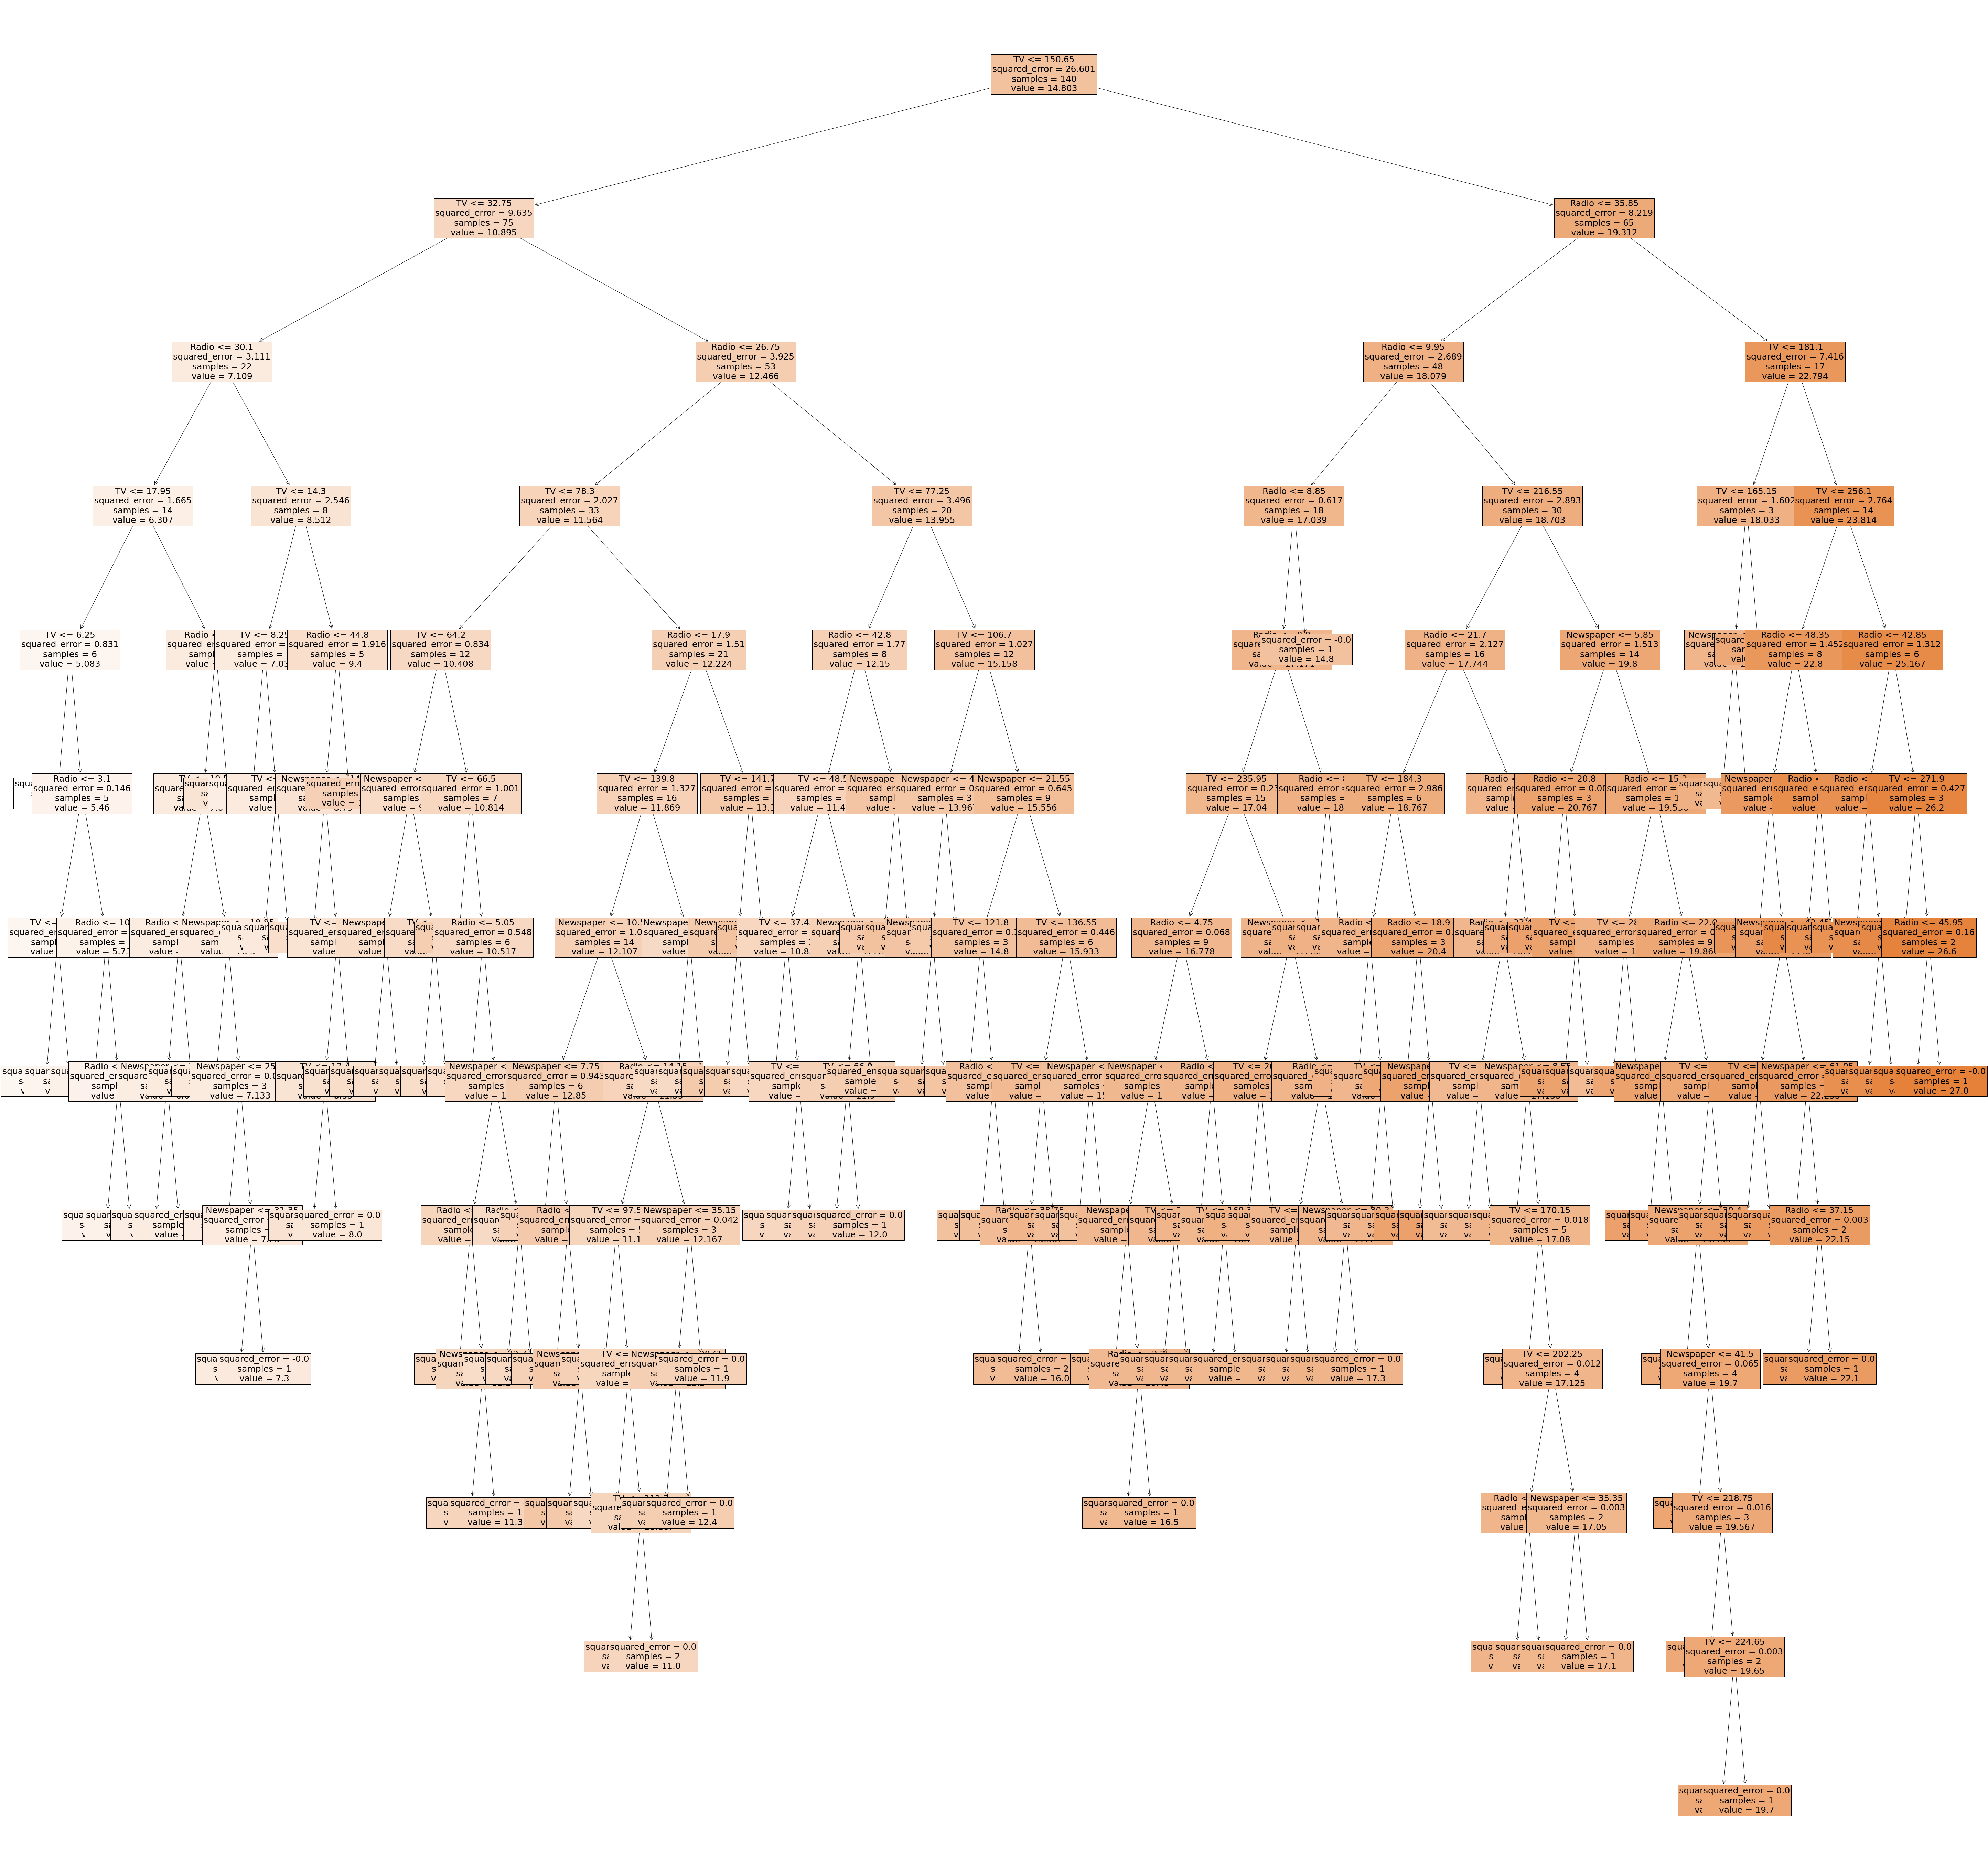

In [25]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(regressionTree, feature_names=X_train.columns,class_names=y_train,filled=True,fontsize=25)

Random Forest Regressor Implementation

In [27]:
from sklearn.ensemble import RandomForestRegressor

randForest = RandomForestRegressor()
randForest.fit(X_train,y_train)
y_predict = randForest.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

MSE = 2.020
R-squared = 0.932


Adaboost Regressor Implementation

In [28]:
from sklearn.ensemble import AdaBoostRegressor

adaBoost = AdaBoostRegressor()
adaBoost.fit(X_train,y_train)
y_predict = adaBoost.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

MSE = 2.344
R-squared = 0.921


Gradient Boosting Regressor Implementation

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

graBoost = GradientBoostingRegressor()
graBoost.fit(X_train,y_train)
y_predict = graBoost.predict(X_test)
print("MSE = %.3f" %metrics.mean_squared_error(y_test, y_predict))
print("R-squared = %.3f" %metrics.r2_score(y_test, y_predict))

MSE = 1.924
R-squared = 0.935
